#LAB 8


Implement the query gates necessary for the algorithm.
 QC that implement a query gate for 1 of the 4 Functions - f1, f2, f3, f4.

 As was discussed previously, the implementation of query gates is not really a part of Deutsch's algorithm itself — here we're essentially just showing one way to prepare the input (in the form of a circuit implementation of a query gate).

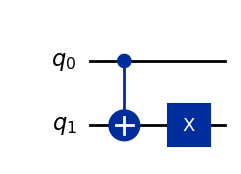

In [1]:
from qiskit import QuantumCircuit

def deustch_function(case: int):

    if case not in [1, 2, 3, 4]:
        raise ValueError(" case must be in 1, 2, 3, or 4")
    
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0,1)
    if case in [3, 4]:
        f.x(1)
    return f

display(deustch_function(3).draw(output='mpl'))

Quantum circuit for Deutsch's algo
Plug in one of the four circuits defined by the deutsch_function and display the circuit.

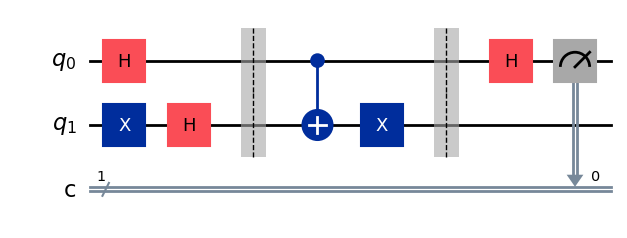

In [4]:
def compile_circuit(function: QuantumCircuit):
    n = function.num_qubits - 1
    qc = QuantumCircuit( n + 1, n)

    qc.x(n)
    qc.h(range(n+1))
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

display(compile_circuit(deustch_function(3)).draw(output='mpl'))




Finally, create a function that runs the circuit  one time and outputs the appropriate result: "constant" or "balanced".

In [13]:
from qiskit_aer import AerSimulator

def deutsch_algo(function: QuantumCircuit):
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots = 1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

deutsch's algo on any one of the 4 functions defined above.

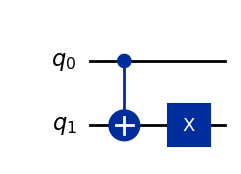

'balanced'

In [14]:
f = deustch_function(3)
display(f.draw(output="mpl"))
display(deutsch_algo(f))

for a function that is constant

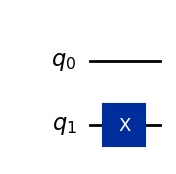

'constant'

In [16]:
f = deustch_function(4)
display(f.draw(output="mpl"))
display(deutsch_algo(f))